
# PCA
---
Linear method that simplify data while preserving maximum variance; suitable for compression and preprocessing.

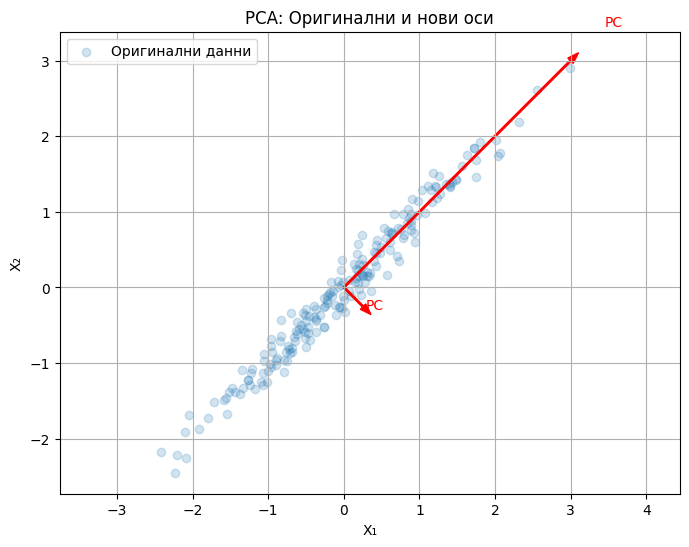

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.2, label='Оригинални данни')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.arrow(0, 0, v[0], v[1], color='r', width=0.02, head_width=0.1)
    plt.text(v[0]*1.15, v[1]*1.15, f'PC', color='r')

plt.xlabel('X₁')
plt.ylabel('X₂')
plt.title('PCA: Оригинални и нови оси')
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()


# ICA
---
A linear approach focused on discovering independent components (sources); ideal for signal separation and biological data analysis.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.preprocessing import scale

img = plt.imread('mixed.jpg')
X = np.reshape(img, (-1, img.shape[-1]))
X = scale(X)

ica = FastICA(n_components=2)
S = ica.fit_transform(X)

component1 = np.reshape(S[:, 0], img.shape[:-1])
component2 = np.reshape(S[:, 1], img.shape[:-1])

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[1].imshow(component1, cmap='gray')
ax[1].set_title('ICA Component 1')
ax[2].imshow(component2, cmap='gray')
ax[2].set_title('ICA Component 2')
plt.show()

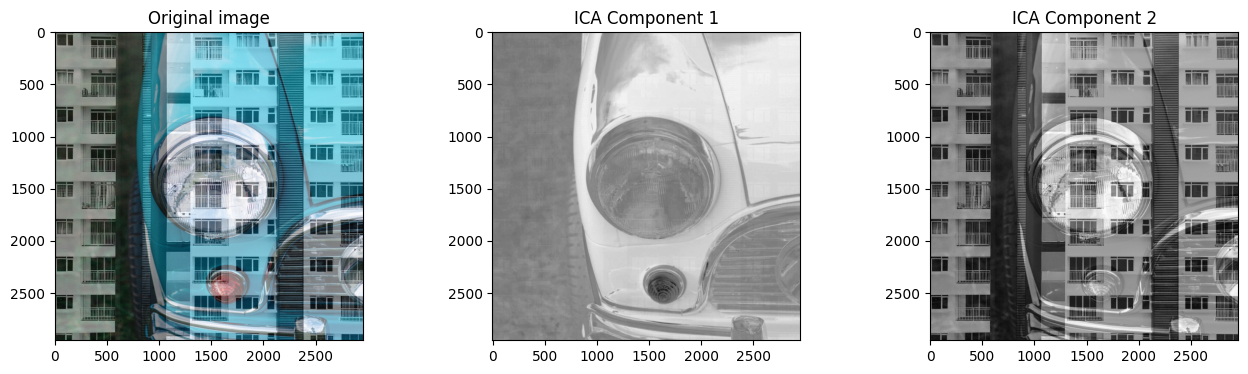

# SVD
---
Linear method that simplify data while preserving maximum variance; suitable for compression and preprocessing.

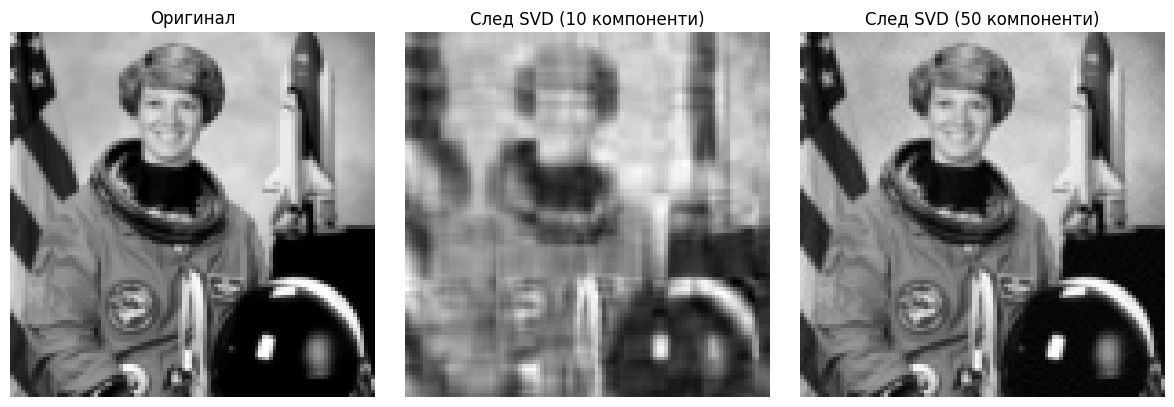

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import resize

original = color.rgb2gray(data.astronaut())
original_resized = resize(original, (100, 100), anti_aliasing=True)

def svd_compress(image, k):
    U, S, VT = np.linalg.svd(image, full_matrices=False)
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    return np.dot(U_k, np.dot(S_k, VT_k))

compressed_10 = svd_compress(original_resized, 10)
compressed_50 = svd_compress(original_resized, 50)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
titles = ["Оригинал", "След SVD (10 компоненти)", "След SVD (50 компоненти)"]
images = [original_resized, compressed_10, compressed_50]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


# NMF
---
A linear method for non-negative data that represents information as a combination of parts; highly interpretable, especially for textual and visual data.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


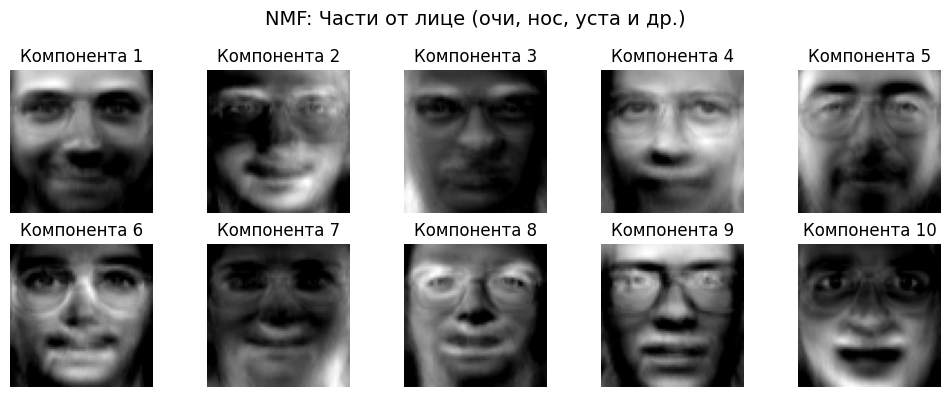

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces(shuffle=True, random_state=0)
X = data.data

n_components = 10
model = NMF(n_components=n_components, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(H[i].reshape(64, 64), cmap='gray')
    ax.set_title(f'Компонента {i+1}')
    ax.axis('off')

plt.suptitle("NMF: Части от лице (очи, нос, уста и др.)", fontsize=14)
plt.tight_layout()
plt.show()


# FA
---
Identifies hidden latent factors and includes noise in the model; commonly used in psychology, marketing, and social sciences.

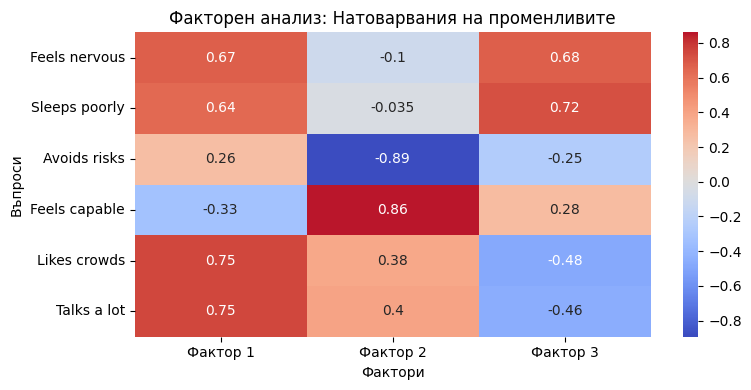

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(42)
n_samples = 100

anxiety = np.random.normal(loc=0, scale=1, size=n_samples)
confidence = np.random.normal(loc=0, scale=1, size=n_samples)
sociability = np.random.normal(loc=0, scale=1, size=n_samples)

data = pd.DataFrame({
    "Feels nervous": anxiety + np.random.normal(0, 0.3, n_samples),
    "Sleeps poorly": anxiety + np.random.normal(0, 0.3, n_samples),
    "Avoids risks": confidence * -1 + np.random.normal(0, 0.3, n_samples),
    "Feels capable": confidence + np.random.normal(0, 0.3, n_samples),
    "Likes crowds": sociability + np.random.normal(0, 0.3, n_samples),
    "Talks a lot": sociability + np.random.normal(0, 0.3, n_samples)
})

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

fa = FactorAnalysis(n_components=3, random_state=0)
fa_components = fa.fit_transform(data_scaled)

loadings = pd.DataFrame(fa.components_.T, index=data.columns, columns=["Фактор 1", "Фактор 2", "Фактор 3"])

plt.figure(figsize=(8, 4))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("Факторен анализ: Натоварвания на променливите")
plt.ylabel("Въпроси")
plt.xlabel("Фактори")
plt.tight_layout()
plt.show()


# UMAP
---
Non-linear visualization method

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


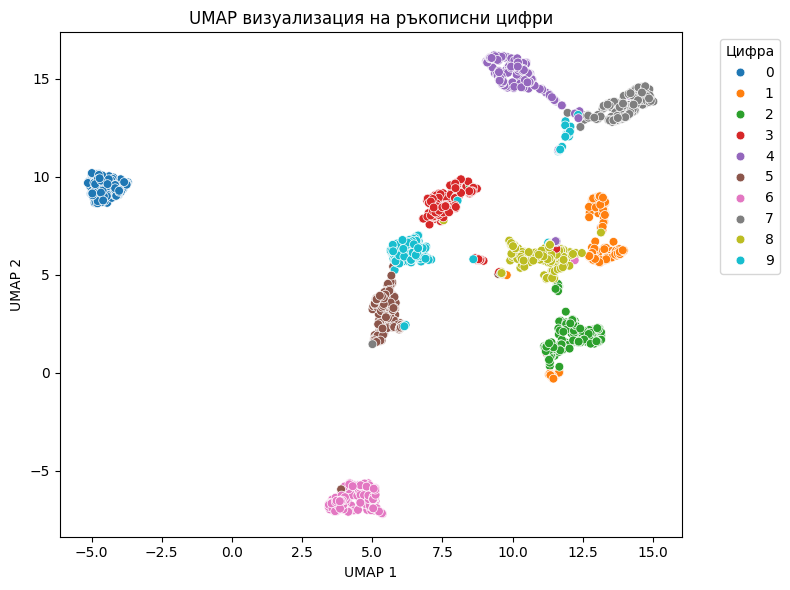

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap

digits = load_digits()
X = digits.data
y = digits.target

X_scaled = StandardScaler().fit_transform(X)

umap_model = umap.UMAP(random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='tab10', s=40, legend='full')
plt.title("UMAP визуализация на ръкописни цифри")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title='Цифра', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()